# 1. LOAD DATA

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
!pip install plotly
import plotly.express as px

In [7]:
path = "C:\\Users\\Khang Tran\\Practice Python\\1. Sales Report\\data\\"
frames = []
for file in os.listdir(path):
    if file.endswith(".csv"):
        fullpath = path + file
        df = pd.read_csv(fullpath)
        frames.append(df)
        df_merged = pd.concat(frames)
df = df_merged
df.to_csv('TotalSales2019.csv',index=False)

In [8]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# 2. CLEAN AND PROCESS DATA

2.1. CHECK FOR NULL AND TYPE

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
#There is no null
#All type are now object. Noted for future use.

2.2. Add 'Month' column

In [10]:
df['Month'] = df['Order Date'].str[:2]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [11]:
df['Month'].unique()

array(['01', nan, 'Or', '02', '10', '11', '12', '03', '04', '05', '06',
       '07', '08', '09'], dtype=object)

In [ ]:
#There are 'nan' and 'Or' value in 'Month'. Need to correct these.

2.3. Remove 'nan' and 'Or' in 'Month'

In [13]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


2.4. Create Sales column

In [18]:
df['Sales'] = pd.to_numeric(df['Quantity Ordered']) * pd.to_numeric(df['Price Each'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [21]:
moving_column = df.pop('Sales')
df.insert(4,'Sales',moving_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


# 3. Which month has the highest sale?

In [24]:
df.groupby('Month').sum()['Sales']

Month
01    1.822257e+06
02    2.202022e+06
03    2.807100e+06
04    3.390670e+06
05    3.152607e+06
06    2.577802e+06
07    2.647776e+06
08    2.244468e+06
09    2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [29]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

4613443.34000153

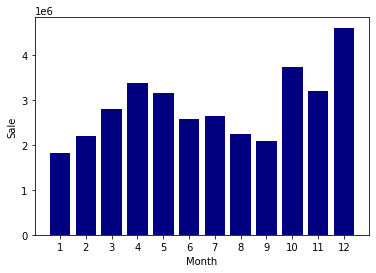

In [39]:
months = range(1,13)
plt.bar(x = months, height = sales_value, color = 'navy')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sale')
plt.show()

In [ ]:
#December is the month with the highest sale value

# 4. Which city has the best sale?

In [54]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles
11682,259354,iPhone,1,700,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco
11683,259355,iPhone,1,700,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,San Francisco


In [55]:
sales_ByCity = df.groupby('City').sum()['Sales']
sales_ByCity

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64

In [56]:
sales_ByCity.max()

8262203.910003961

In [71]:
cities =[]
for city,sales in sales_ByCity.items():
    cities.append(city)
cities

[' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle']

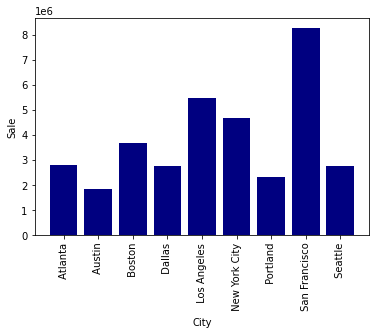

In [72]:
plt.bar(x = cities, height = sales_ByCity, color = 'navy')
plt.xticks(cities,rotation='90')
plt.xlabel('City')
plt.ylabel('Sale')
plt.show()

In [ ]:
#San Francisco is the city with the highest sale

# 5. What time should we display ads to maximize the likelihood of customer’s buying product?

In [73]:
df['Order Date']

0        01/22/19 21:25
1        01/28/19 14:15
2        01/17/19 13:33
3        01/05/19 20:33
4        01/25/19 11:59
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

In [78]:
#Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtypes)

datetime64[ns]


In [80]:
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20
11682,259354,iPhone,1,700,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16
11683,259355,iPhone,1,700,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17


In [91]:
order_ByHour = df.groupby('Hour').count()['Sales']
order_ByHour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

In [92]:
sales_ByHour.max()

2412938.540000101

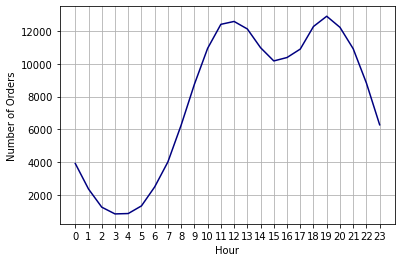

In [112]:
hours = []
for hour,sales in order_ByHour.items():
    hours.append(hour)
plt.plot(hours, order_ByHour, color = 'navy')
plt.grid()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
#Number of orders reachs its peaks at around 11-12AM and 6-8PM
#These are the times when people take a rest after their morning shift and when people coming home from work
#We can play ads from 30 minutes prior to the the peak period and during peak times to maximize the likelihood of customer's buying products
#However, different cities might have different peak times -> Moving on to check peak time in each city

In [103]:
order_ByHourCity = df.groupby(['Hour','City']).count()['Sales'].to_frame(name = 'Number of Orders').reset_index()
order_ByHourCity

,Hour,City,Number of Orders
0,0,Atlanta,310
1,0,Austin,198
2,0,Boston,426
3,0,Dallas,285
4,0,Los Angeles,637
...,...,...,...
211,23,Los Angeles,1009
212,23,New York City,814
213,23,Portland,387
214,23,San Francisco,1462


In [110]:
fig = px.scatter_3d(order_ByHourCity, x='Hour', y='City', z='Number of Orders',color='City')
fig.show()

In [ ]:
#It seems that the peak time of each city is similar to each other in this dataset
#so I still maintain my previous decision in ads play time

# 6. Which products are often bought together?

In [114]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20
11639,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
11677,259350,Google Phone,1,600,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13


In [117]:
ord_prod = df_dup.groupby('Order ID')['Product'].apply(', '.join).reset_index()
ord_prod

,Order ID,Product
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop, Wired Headphones"
7132,319556,"Google Phone, Wired Headphones"
7133,319584,"iPhone, Wired Headphones"
7134,319596,"iPhone, Lightning Charging Cable"


In [128]:
prod_ord = ord_prod.groupby('Product').count().reset_index()
prod_ord.columns = ['Products','Number of Orders']
prod_ord.sort_values(by = 'Number of Orders', ascending = False, inplace = True)
prod_ord.head(10) #Filter top 10

,Products,Number of Orders
342,"iPhone, Lightning Charging Cable",882
173,"Google Phone, USB-C Charging Cable",856
363,"iPhone, Wired Headphones",361
299,"Vareebadd Phone, USB-C Charging Cable",312
191,"Google Phone, Wired Headphones",303
334,"iPhone, Apple Airpods Headphones",286
163,"Google Phone, Bose SoundSport Headphones",161
305,"Vareebadd Phone, Wired Headphones",104
184,"Google Phone, USB-C Charging Cable, Wired Head...",77
292,"Vareebadd Phone, Bose SoundSport Headphones",60


In [ ]:
#Based on the finding above, company can either 
#(1) create a discount on combos of those products to increase number of orders on those products
#or (2) add another 1, 2 less-favored product(s) to the combos to upsell those products

# 7. Which product is sold the most?

In [163]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)
df.head()

int64
float64


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [164]:
product_sold = df.groupby('Product').sum()['Quantity Ordered'].to_frame(name = 'Unit sold').reset_index()
product_sold

,Product,Unit sold
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


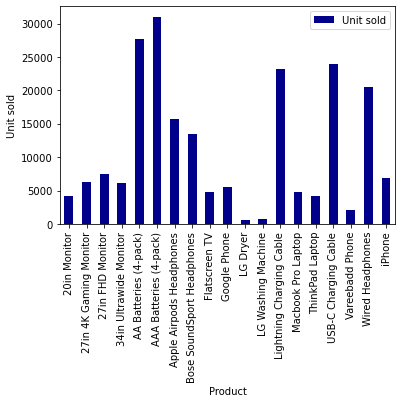

In [165]:
product_sold.plot(x = 'Product', y='Unit sold', kind='bar', color = 'darkblue')
plt.xlabel('Product')
plt.ylabel('Unit sold')
plt.show()

In [166]:
#The most sold products are AAA Batteries (4-pack) and AA Batteries (4-pack)
#This could be due to price, or brand, or quality
#Because I don't have all the info, let's check out their price if my hypothesis is right

Why the above items are the most sold products? (let's find out if they have anything to do with price)

In [167]:
product_unit_price = df.groupby('Product').mean()['Price Each'].to_frame(name = 'Unit price').reset_index()
product_unit_price

,Product,Unit price
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


<ipython-input-176-0fa6ad2bc04f>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



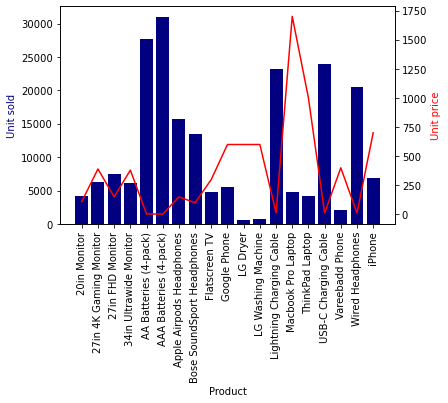

In [176]:
x = product_sold['Product']
y1 = product_sold['Unit sold']
y2 = product_unit_price['Unit price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'navy')
ax2.plot(x, y2, color= 'red')

ax1.set_xticklabels(x, rotation = 90)
ax1.set_xlabel('Product')
ax1.set_ylabel('Unit sold', color='navy')
ax2.set_ylabel('Unit price', color='red')

plt.show()

In [177]:
#From the result, we can see that there is a correlation between uni price and number of units sold
#The lower the price, the higher the sold quantity
#-> The earlier hypothesis is true